In [1]:
import geopandas as gpd
import os
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from rasterio.plot import show
from rasterio.features import shapes

Creating a path to the data 

In [2]:
# List of directory paths
directory_paths = [
    r'C:\Users\Student\Documents\101_walrus_mres\planet_skysat_pairs\planet_skysat_pairs\buchholzbukta_psscene_analytic_8b_sr_udm2\PSScene',
    r'C:\Users\Student\Documents\101_walrus_mres\planet_skysat_pairs\planet_skysat_pairs\buchholzbukta_skysatscene_pansharpened_udm2\SkySatScene',
    r'C:\Users\Student\Documents\101_walrus_mres\planet_skysat_pairs\planet_skysat_pairs\moffen_psscene_analytic_8b_sr_udm2\PSScene',
    r'C:\Users\Student\Documents\101_walrus_mres\planet_skysat_pairs\planet_skysat_pairs\moffen_skysatscene_pansharpened_udm2\SkySatScene',
    r'C:\Users\Student\Documents\101_walrus_mres\planet_skysat_pairs\planet_skysat_pairs\poolepynten_psscene_analytic_8b_sr_udm2\PSScene',
    r'C:\Users\Student\Documents\101_walrus_mres\planet_skysat_pairs\planet_skysat_pairs\poolepynten_skysatscene_pansharpened_udm2\SkySatScene',
    r'C:\Users\Student\Documents\101_walrus_mres\planet_skysat_pairs\planet_skysat_pairs\sletteoya_psscene_analytic_8b_sr_udm2\PSScene',
    r'C:\Users\Student\Documents\101_walrus_mres\planet_skysat_pairs\planet_skysat_pairs\sletteoya_skysatscene_pansharpened_udm2',
    r'C:\Users\Student\Documents\101_walrus_mres\planet_skysat_pairs\planet_skysat_pairs\torellneset_psscene_analytic_8b_sr_udm2\PSScene',
    r'C:\Users\Student\Documents\101_walrus_mres\planet_skysat_pairs\planet_skysat_pairs\torellneset_skysatscene_pansharpened_udm2\SkySatScene'
]

# Iterate through each directory path
for directory_path in directory_paths:
    # Process each file in the directory
    for root, dirs, files in os.walk(directory_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)

Selecting one image to explore 

In [4]:
# Define the directories containing images and shapefiles
walrus_mres_dir = os.path.abspath("../../")
# If this does not work replace the walrus_dir with your own path to get the data

# Place file path to the image here
#filename = "C:\\Users\\Student\\Documents\\101_walrus_mres\\planet_skysat_pairs\\planet_skysat_pairs\\buchholzbukta_psscene_analytic_8b_sr_udm2\\PSScene\\20230714_104853_14_24a1_3B_AnalyticMS_SR_8b_harmonized_clip.tif"

filename = os.path.join(walrus_mres_dir, "planet_skysat_pairs", "planet_skysat_pairs", "torellneset_skysatscene_pansharpened_udm2", "SkySatScene", "20230825_104320_ssc13d3_0006_pansharpened_clip.tif")

Meta data check

In [16]:
# Overall details
with rasterio.open(filename) as my_raster_image:
     print(my_raster_image.profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 4410, 'height': 4170, 'count': 4, 'crs': CRS.from_epsg(32634), 'transform': Affine(0.5, 0.0, 493001.0,
       0.0, -0.5, 8810842.5), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


In [17]:
# Width and height of raster in meters

width_in_projected_units = my_raster_image.bounds.right - my_raster_image.bounds.left
height_in_projected_units = my_raster_image.bounds.top - my_raster_image.bounds.bottom

print("Width: {} meters, Height: {} meters".format(
    round(width_in_projected_units), 
    round(height_in_projected_units)
))

Width: 2205 meters, Height: 2085 meters


In [18]:
# Find the resolution of a single pixel
x_length = (my_raster_image.bounds.right - my_raster_image.bounds.left) / my_raster_image.width
y_length = (my_raster_image.bounds.top - my_raster_image.bounds.bottom) / my_raster_image.height

print("Length of x is: {}. Length of y is: {}".format(x_length, y_length))
print("Therefore, it is {} that the pixels are square, with dimensions {} x {} meters.".format(
    x_length == y_length, x_length, y_length))

Length of x is: 0.5. Length of y is: 0.5
Therefore, it is True that the pixels are square, with dimensions 0.5 x 0.5 meters.


In [19]:
# Check how many bands in image 
print(len(my_raster_image.read()))

RasterioIOError: Dataset is closed: C:/Users/Student/Documents/101_walrus_mres/planet_skysat_pairs/planet_skysat_pairs/torellneset_skysatscene_pansharpened_udm2/SkySatScene/20230825_104320_ssc13d3_0006_pansharpened_clip.tif

If that doesnt work try this 

In [20]:
with rasterio.open(filename) as my_raster_image:
    # Check how many bands in image
    num_bands = len(my_raster_image.indexes)
    print("Number of bands:", num_bands)

Number of bands: 4


In [79]:
# Array of full bands
data = my_raster_image.read()
data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [83]:
# Unpacking bands into separate variables
red = data[5]
red

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

Bands in PSScene                                               Bands in SkySat

Band 1 = Coastal Blue [0]                                      Band 1 = Blue  (450-515)   [0]
Band 2 = Blue         [1]                                      Band 2 = Green (515, 595)  [1]
Band 3 = Green 1      [2]                                      Band 3 = Red   (605, 695)  [2]
Band 4 = Green        [3]                                      Band 4 = NIR   (740, 900)  [3]
Band 5 = Yellow       [4]
Band 6 = Red          [5]
Band 7 = Red Edge     [6]
Band 8 = NIR          [7]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


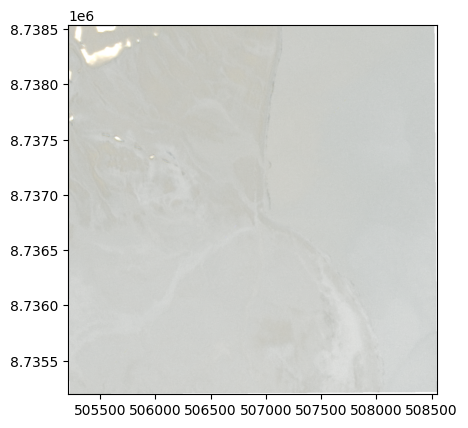

<Axes: >

In [109]:
rasterio.plot.show(
    my_raster_image.read([4, 3, 2, 1]) / 4000, 
    transform=my_raster_image.transform
)

Normalized Difference Vegetation Index (NDVI)

C:\Users\Student\AppData\Local\Temp\ipykernel_7948\1511521285.py:9: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)


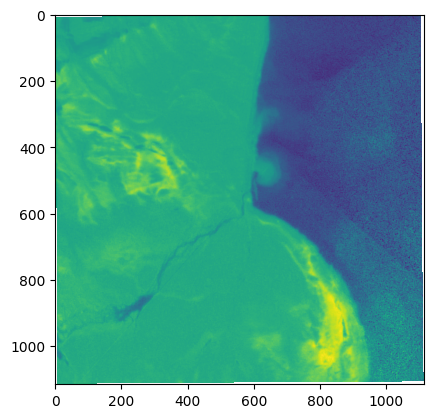

In [45]:
def scale(band): # scale values for display purposes
    return band / 10000.0

my_raster_image = rasterio.open(filename)

red = scale(my_raster_image.read(6))
nir = scale(my_raster_image.read(8))

ndvi = (nir - red) / (nir + red)

pyplot.imshow(ndvi)

# Export the layer to a .png image.
pyplot.savefig('export_ndvi.png', bbox_inches='tight')

Normalized Difference Water Index (NDWI)

C:\Users\Student\AppData\Local\Temp\ipykernel_7948\1099963094.py:9: RuntimeWarning: invalid value encountered in divide
  ndwi = (green - nir) / (green + nir)


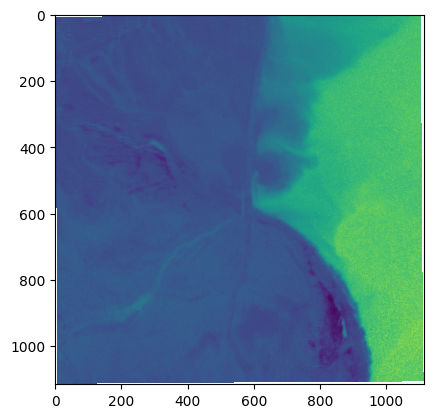

In [60]:
def scale(band): # scale values for display purposes
    return band / 10000.0

my_raster_image = rasterio.open(filename)

green = scale(my_raster_image.read(3))
nir = scale(my_raster_image.read(7))

ndwi = (green - nir) / (green + nir)

pyplot.imshow(ndwi)

# Export the layer to a .png image.
pyplot.savefig('export_ndwi.png', bbox_inches='tight')

Bands in PSScene 

Band 1 = Coastal Blue [0]
Band 2 = Blue         [1]
Band 3 = Green 1      [2]
Band 4 = Green        [3]
Band 5 = Yellow       [4]
Band 6 = Red          [5]
Band 7 = Red Edge     [6]
Band 8 = NIR          [7]

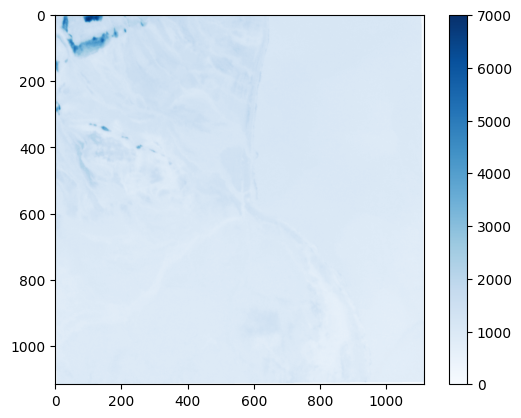

In [10]:
# Coastal blue band
blue = my_raster_image.read()[0]

# Use imshow to load blue band.
fig = plt.imshow(blue, cmap="Blues")

# Add colorbar to plot
plt.colorbar() 

# Display results
plt.show()

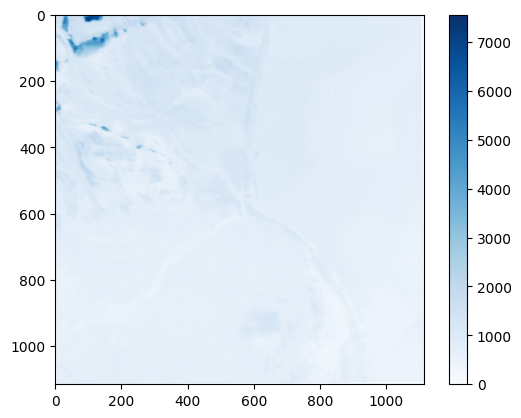

In [25]:
# Blue band
green = my_raster_image.read()[1]

# Use imshow to load green band.
fig = plt.imshow(green, cmap='Blues')

# Add colorbar
plt.colorbar() 

# Display the results.
plt.show()

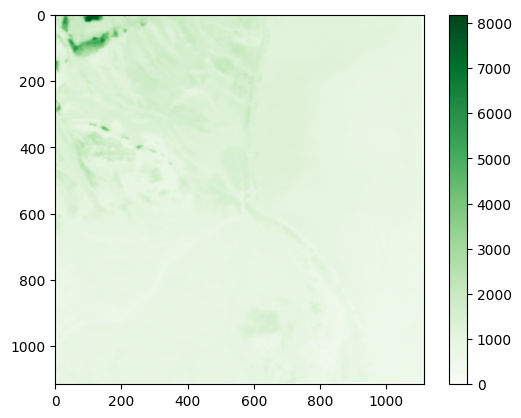

In [26]:
# Green band
green = my_raster_image.read()[2]

# Use imshow to load green band.
fig = plt.imshow(green, cmap='Greens')

# Add colorbar
plt.colorbar() 

# Display the results.
plt.show()

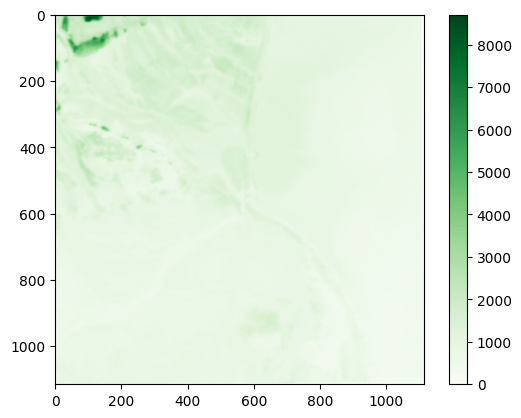

In [27]:
# Green band 1
green = my_raster_image.read()[3]

# Use imshow to load green band.
fig = plt.imshow(green, cmap='Greens')

# Add colorbar
plt.colorbar() 

# Display the results.
plt.show()

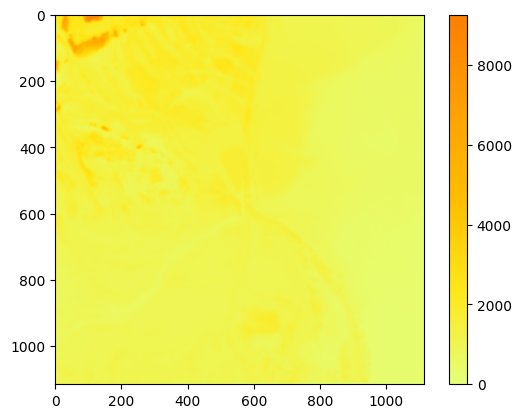

In [29]:
# Yellow band 
red = my_raster_image.read()[4]

# Use imshow to load red band.
fig = plt.imshow(red, cmap='Wistia')

# Add colorbar 
plt.colorbar() 

# Display the results.
plt.show()

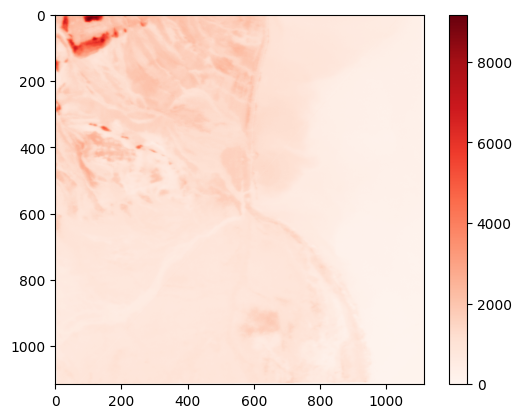

In [30]:
# Red band 
red = my_raster_image.read()[5]

# Use imshow to load red band.
fig = plt.imshow(red, cmap='Reds')

# Add colorbar 
plt.colorbar() 

# Display the results.
plt.show()

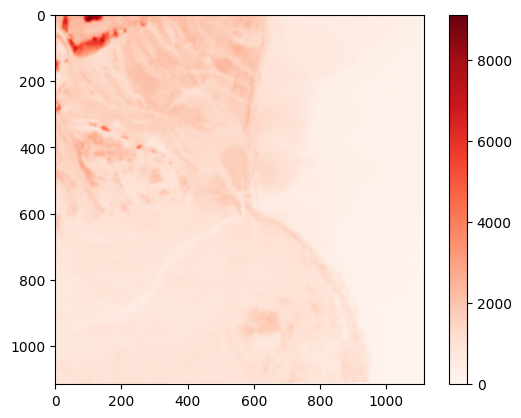

In [32]:
# Red edge band 
red = my_raster_image.read()[6]

# Use imshow to load red band.
fig = plt.imshow(red, cmap='Reds')

# Add colorbar 
plt.colorbar()

# Display the results.
plt.show()

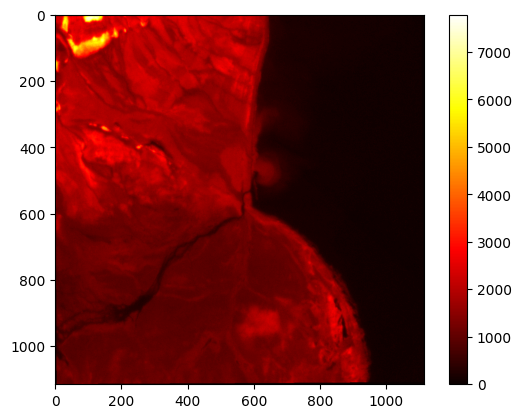

In [68]:
# Near infared band
nir = my_raster_image.read()[7]

# Use imshow to load nir band.
fig = plt.imshow(nir, cmap='hot')

# Add colorbar 
plt.colorbar() 

# Display the results.
plt.show()

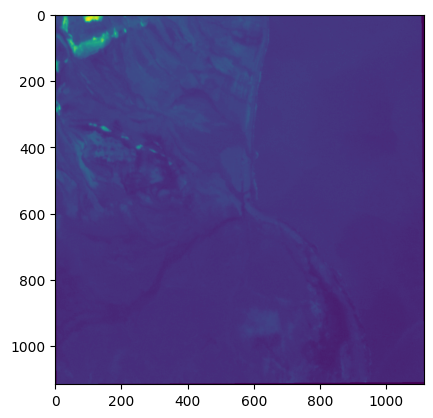

In [11]:
plt.imshow(my_raster_image.read(1))

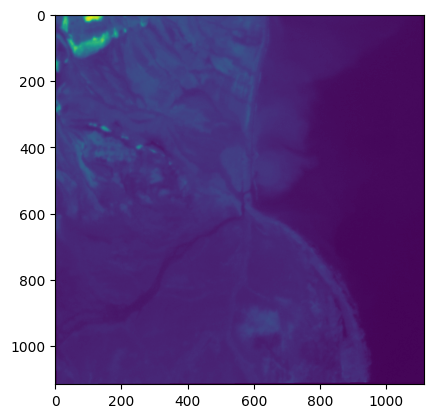

In [90]:
plt.imshow(my_raster_image.read(7))

Band 1 = Coastal Blue [0]
Band 2 = Blue         [1]
Band 3 = Green 1      [2]
Band 4 = Green        [3]
Band 5 = Yellow       [4]
Band 6 = Red          [5]
Band 7 = Red Edge     [6]
Band 8 = NIR          [7]

In [113]:
# Separate each band and reformat 
Coastal_Blue = my_raster_image.read(1).astype(np.float32)
Blue = my_raster_image.read(2).astype(np.float32)      
Green_1 = my_raster_image.read(3).astype(np.float32)
Green = my_raster_image.read(4).astype(np.float32)
Yellow = my_raster_image.read(5).astype(np.float32)     
Red = my_raster_image.read(6).astype(np.float32)       
Red_Edge = my_raster_image.read(7).astype(np.float32)
NIR = my_raster_image.read(8).astype(np.float32)

# Separate one to get array
NIR

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Separating water and land 

In [118]:
# Create a new empty numpy array of zeros.
water_index = np.zeros(nir.shape)

# Estimate NDWI values 
water_index = ((Green - NIR)/(Green + NIR))

C:\Users\Student\AppData\Local\Temp\ipykernel_7948\989298347.py:5: RuntimeWarning: invalid value encountered in divide
  water_index = ((Green - NIR)/(Green + NIR))


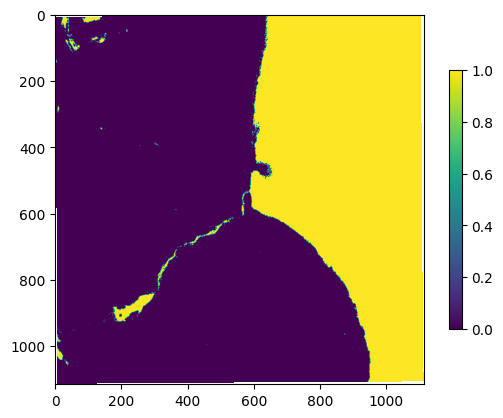

In [119]:
# This is a conditional reassignment, so allocate the value to the right hand of the equals,
# If the pixel matches the condition in the square parantheses
water_index[(water_index > 0)] = 1
water_index[(water_index <= 0)] = 0

plt.imshow(water_index)
plt.colorbar(shrink=0.7)

C:\Users\Student\AppData\Local\Temp\ipykernel_7948\1516288334.py:5: RuntimeWarning: invalid value encountered in divide
  water_index1 = ((NIR - Red)/(NIR + Red))


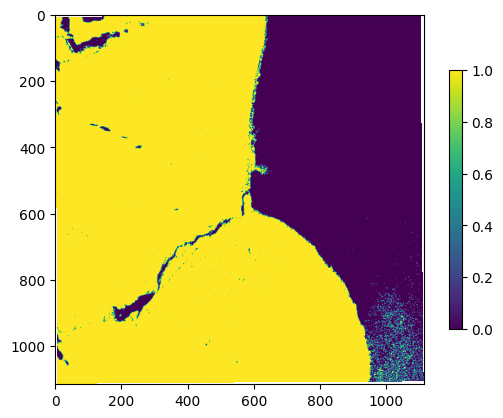

In [120]:
# Create a new empty numpy array of zeros.
water_index1 = np.zeros(nir.shape)

# Estimate NDWI values 
water_index1 = ((NIR - Red)/(NIR + Red))

water_index1[(water_index1 > 0)] = 1
water_index1[(water_index1 <= 0)] = 0

plt.imshow(water_index1)
plt.colorbar(shrink=0.7)


C:\Users\Student\AppData\Local\Temp\ipykernel_7948\2728068236.py:1: RuntimeWarning: invalid value encountered in divide
  ndvi = (Coastal_Blue - Blue - NIR) / (Blue + Coastal_Blue + NIR)


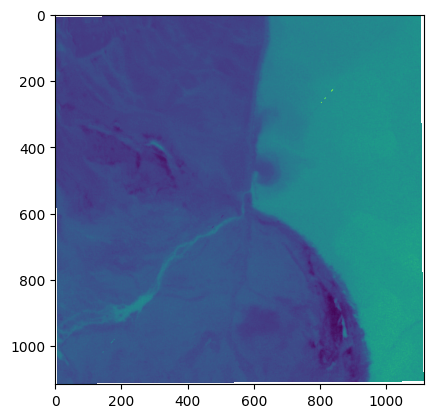

In [132]:
ndvi = (Coastal_Blue - Blue - NIR) / (Blue + Coastal_Blue + NIR)

plt.imshow(ndvi)

C:\Users\Student\AppData\Local\Temp\ipykernel_7948\2322754464.py:4: RuntimeWarning: divide by zero encountered in divide
  water_index2 = ((Blue + Red) / (Blue - Red))
C:\Users\Student\AppData\Local\Temp\ipykernel_7948\2322754464.py:4: RuntimeWarning: invalid value encountered in divide
  water_index2 = ((Blue + Red) / (Blue - Red))


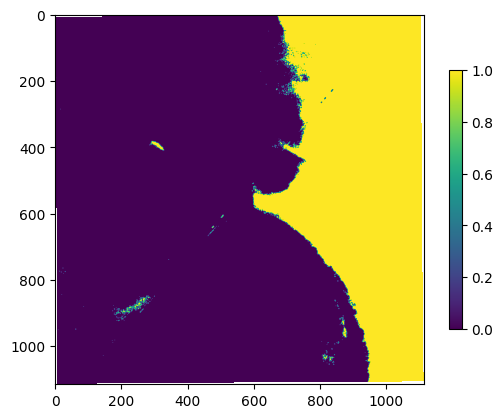

In [135]:
water_index2 = np.zeros(nir.shape)

# Estimate NDWI values 
water_index2 = ((Blue + Red) / (Blue - Red))

water_index2[(water_index2 > 0)] = 1
water_index2[(water_index2 <= 0)] = 0

plt.imshow(water_index2)
plt.colorbar(shrink=0.7)

C:\Users\Student\AppData\Local\Temp\ipykernel_7948\970372804.py:4: RuntimeWarning: divide by zero encountered in divide
  t3 = ((NIR + Coastal_Blue) / (NIR - Coastal_Blue))
C:\Users\Student\AppData\Local\Temp\ipykernel_7948\970372804.py:4: RuntimeWarning: invalid value encountered in divide
  t3 = ((NIR + Coastal_Blue) / (NIR - Coastal_Blue))


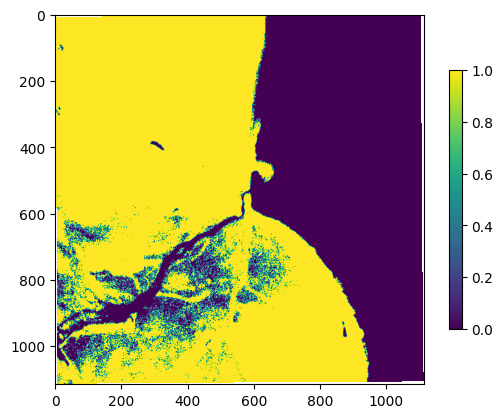

In [138]:
t3 = np.zeros(nir.shape)

# Estimate NDWI values 
t3 = ((NIR + Coastal_Blue) / (NIR - Coastal_Blue))

t3[(t3 > 0)] = 1
t3[(t3 <= 0)] = 0

plt.imshow(t3)
plt.colorbar(shrink=0.7)

C:\Users\Student\AppData\Local\Temp\ipykernel_7948\762988825.py:4: RuntimeWarning: invalid value encountered in divide
  t4 = ((Yellow - Coastal_Blue) / (Coastal_Blue + Yellow))


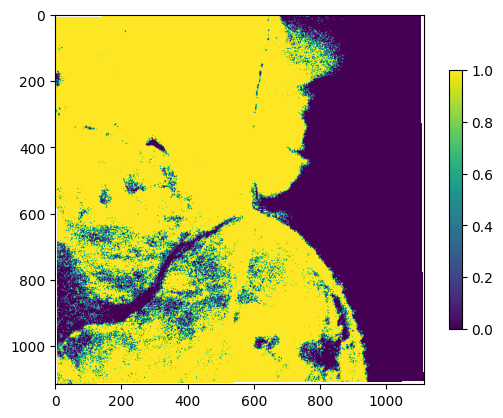

In [143]:
t4 = np.zeros(nir.shape)

# Estimate NDWI values 
t4 = ((Yellow - Coastal_Blue) / (Coastal_Blue + Yellow))

t4[(t4 > 0)] = 1
t4[(t4 <= 0)] = 0

plt.imshow(t4)
plt.colorbar(shrink=0.7)

C:\Users\Student\AppData\Local\Temp\ipykernel_7948\158616082.py:4: RuntimeWarning: divide by zero encountered in divide
  hy = ((Yellow + NIR) / (Yellow - NIR))
C:\Users\Student\AppData\Local\Temp\ipykernel_7948\158616082.py:4: RuntimeWarning: invalid value encountered in divide
  hy = ((Yellow + NIR) / (Yellow - NIR))


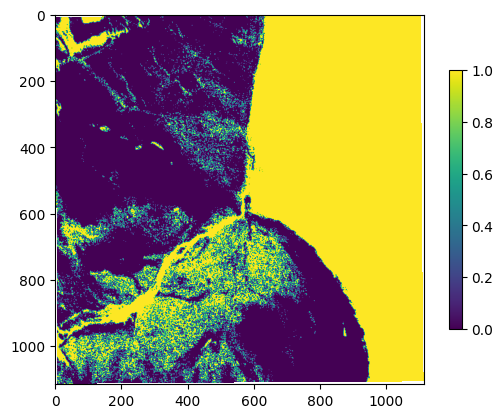

In [148]:
hy = np.zeros(nir.shape)

# Estimate NDWI values 
hy = ((Yellow + NIR) / (Yellow - NIR))

hy[(hy > 0)] = 1
hy[(hy <= 0)] = 0

plt.imshow(hy)
plt.colorbar(shrink=0.7)

C:\Users\Student\AppData\Local\Temp\ipykernel_7948\875271851.py:4: RuntimeWarning: divide by zero encountered in divide
  hy = ((Red_Edge + NIR) / (Red_Edge - NIR))
C:\Users\Student\AppData\Local\Temp\ipykernel_7948\875271851.py:4: RuntimeWarning: invalid value encountered in divide
  hy = ((Red_Edge + NIR) / (Red_Edge - NIR))


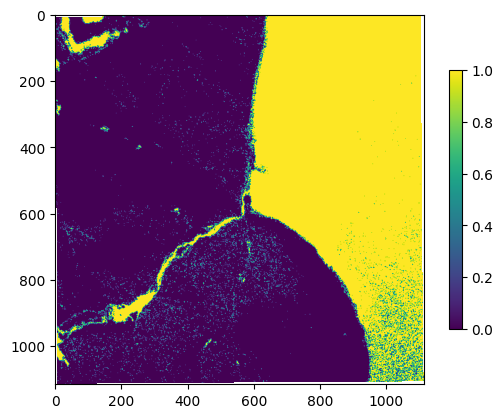

In [149]:
hy = np.zeros(nir.shape)

# Estimate NDWI values 
hy = ((Red_Edge + NIR) / (Red_Edge - NIR))

hy[(hy > 0)] = 1
hy[(hy <= 0)] = 0

plt.imshow(hy)
plt.colorbar(shrink=0.7)